In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


## 1 - Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together.

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”.


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then
     * Refines this guess by
         * Repeatedly assigning examples to their closest centroids, and then
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step:
        # Assign each data point to the closest centroid.
        # idx[i] corresponds to the index of the centroid
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step:
        # Compute means based on centroid assignments
        centroids = compute_centroids(X, idx, K)
    ```


* The inner-loop of the algorithm repeatedly carries out two steps:
    1. Assigning each training example $x^{(i)}$ to its closest centroid, and
    2. Recomputing the mean of each centroid using the points assigned to it.
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids.

* However, the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations.
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

You will implement the two phases of the K-means algorithm separately
in the next sections.
* You will start by completing `find_closest_centroid` and then proceed to complete `compute_centroids`.

<a name="1.1"></a>
### 1.1 Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids.


build `find_closest_centroids` function.
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids`
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{0,...,K-1\}$, where $K$ is total number of centroids) to every training example . *(Note: The index range 0 to K-1 varies slightly from what is shown in the lectures (i.e. 1 to K) because Python list indices start at 0 instead of 1)*
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 * $||x^{(i)} - \mu_j||$ is the L2-norm



In [ ]:
def find_closest_centroid(X, centroids):

  #Set K
  K = centroids.shape[0]

  # You need to return the following variables correctly
  idx = np.zeros(X.shape[0], dtype= int)

  for i in range(X.shape[0]):
    distance = []
    for j in range(centroids.shape[0]):
        norm_ij = np.linalg.norm(X[i] - centroids[j])  # Euclidean
        distance.append(norm_ij)


    idx[i] = np.argmin(distance)

  return idx

In [ ]:
#load dataset
X = np.load('/content/ex7_X.npy')

print("First five elements of X are:\n", X[:5])
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [ ]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroid(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [0 2 1]


<a name="1.2"></a>
### 1.2 Computing centroid means

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.


build `compute_centroids` function below to recompute the value for each centroid

* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$

    where
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.


In [ ]:
def compute_centroids(X, idx, K):

  # Useful variables
  m,n = X.shape

  # You need to return the following variables correctly
  centroids = np.zeros((K, n))

  for k in range(K):
    points = X[idx == k]
    centroids[k] = np.mean(points, axis=0)
  return centroids

In [ ]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## 2 - K-means on a sample dataset




In [ ]:
def plot_final_kMeans(X, centroids_history, idx, K):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'orange', 'purple', 'brown', 'pink']
    final_centroids = centroids_history[-1]

    plt.figure(figsize=(8, 6))

    # Plot data points for each cluster
    for k in range(K):
        cluster_points = X[idx == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    c=colors[k % len(colors)], alpha=0.6, label=f'Cluster {k}')

    # Plot centroid movement path and intermediate positions
    for k in range(K):
        movement = np.array([c[k] for c in centroids_history])
        plt.plot(movement[:, 0], movement[:, 1], 'k--', linewidth=1)
        plt.scatter(movement[:, 0], movement[:, 1], c='black', s=25)

    # Plot final centroids
    plt.scatter(final_centroids[:, 0], final_centroids[:, 1],
                c='black', marker='x', s=100, linewidths=3, label='Final Centroids')

    plt.title("Final K-Means Iteration")
    plt.legend()
    plt.show()

In [ ]:
def runs_kMeans(X, initial_centroids, max_iter=10, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    centroids_history = [centroids.copy()]
    idx = np.zeros(m)

    for i in range(max_iter):
        print("K-Means iteration %d/%d" % (i, max_iter-1))
        idx = find_closest_centroid(X, centroids)
        centroids = compute_centroids(X, idx, K)
        centroids_history.append(centroids.copy())

    if plot_progress:
        plot_final_kMeans(X, centroids_history, idx, K)

    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


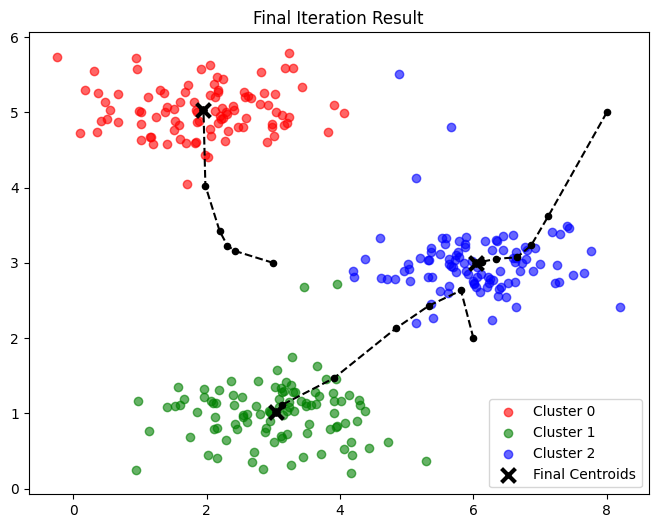

In [ ]:
# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = runs_kMeans(X, initial_centroids, max_iters, plot_progress=True)

## 3 - Random initialization

In this part of how the function `kMeans_init_centroids` is implemented.
* The code first randomly shuffles the indices of the examples (using `np.random.permutation()`).
* Then, it selects the first $K$ examples based on the random permutation of the indices.
* This allows the examples to be selected at random without the risk of selecting the same example twice.

In [ ]:
def kMeans_init_centroids(X, K):

  # Randomly reorder the indices of examples
  randidx = np.random.permutation(X.shape[0])

  # Take the first K examples as centroids
  centroids = X[randidx[:K]]

  return centroids

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


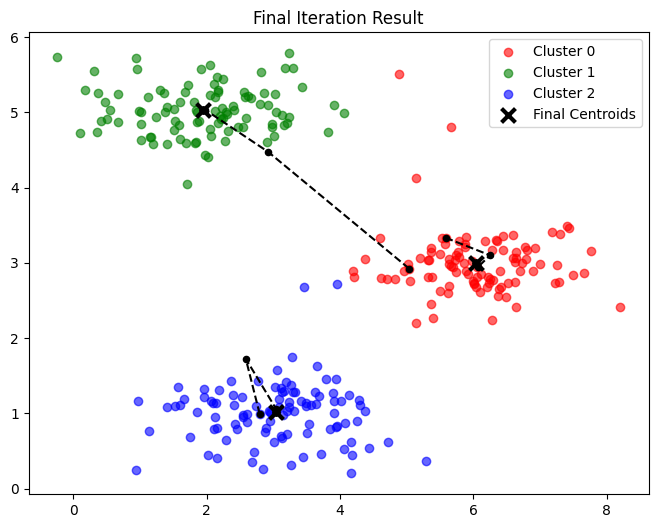

In [ ]:
# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = runs_kMeans(X, initial_centroids, max_iters, plot_progress=True)

## 4 - Image compression with K-means

In this section, you will apply K-means to image compression.

* In a straightforward 24-bit color representation of an image$^{2}$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way.
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
* Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.


### 4.1 Dataset

**Load image**

<function matplotlib.pyplot.show(close=None, block=None)>

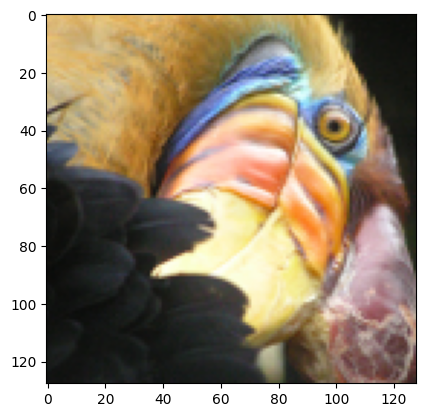

In [ ]:
# Load an image of a bird
original_img = plt.imread("/content/bird_small.png")

# Visualizing the image
plt.imshow(original_img)
plt.show

**Check the dimension of the variable**

In [ ]:
print('shape of original image id: ', original_img.shape)

shape of original image id:  (128, 128, 3)


As you can see, this creates a three-dimensional matrix `original_img` where
* the first two indices identify a pixel position, and
* the third index represents red, green, or blue.

For example, `original_img[50, 33, 2]` gives the blue intensity of the pixel at row 50 and column 33.

#### Processing data

To call the `run_kMeans`, you need to first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=16384 = 128\times128$)



In [ ]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [ ]:
K = 12
max_iters = 15

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = runs_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/14
K-Means iteration 1/14
K-Means iteration 2/14
K-Means iteration 3/14
K-Means iteration 4/14
K-Means iteration 5/14
K-Means iteration 6/14
K-Means iteration 7/14
K-Means iteration 8/14
K-Means iteration 9/14
K-Means iteration 10/14
K-Means iteration 11/14
K-Means iteration 12/14
K-Means iteration 13/14
K-Means iteration 14/14


In [ ]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [11 11 11 11 11]


### 4.3 Compress the image
After finding the top $K=16$ colors to represent the image, now
assign each pixel position to its closest centroid using the
`find_closest_centroids` function.
* This allows you to represent the original image using the centroid assignments of each pixel.
* Notice that you have significantly reduced the number of bits that are required to describe the image.
    * The original image required 24 bits (i.e. 8 bits x 3 channels in RGB encoding) for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits.
    * The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location.
    * The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [ ]:
# Find the closest centroid of each pixel
idx = find_closest_centroid(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

Finally, you can view the effects of the compression by reconstructing
the image based only on the centroid assignments.
* Specifically, you replaced each pixel with the value of the centroid assigned to
it.
* Figure 3 shows a sample reconstruction. Even though the resulting image retains most of the characteristics of the original, you will also see some compression artifacts because of the fewer colors used.

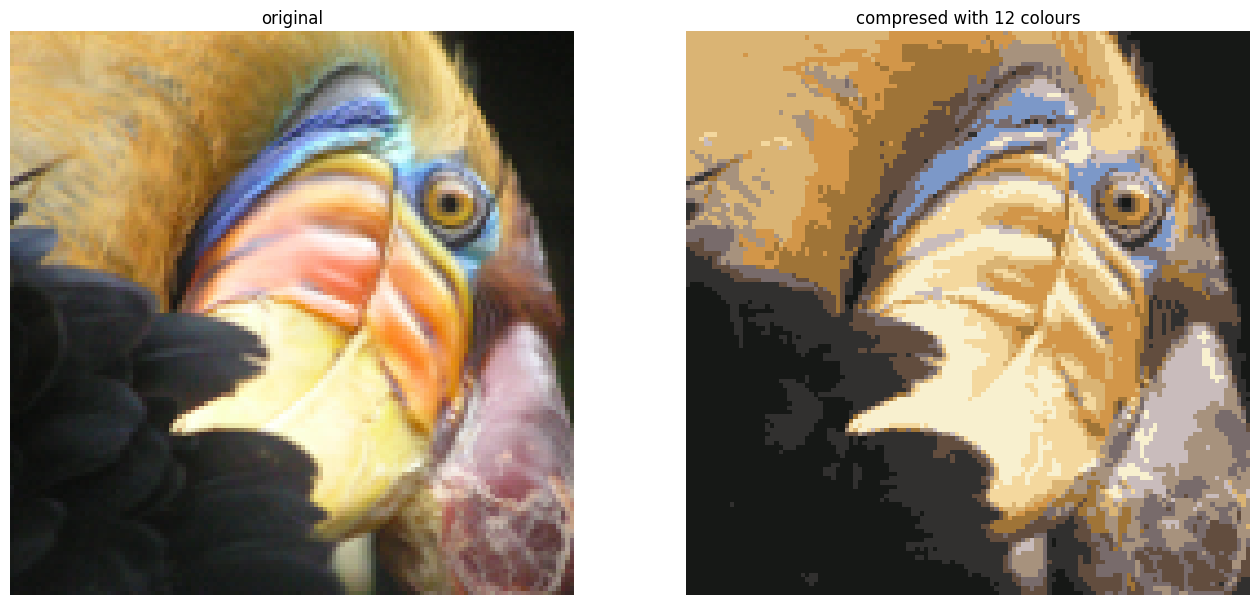

In [ ]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('original')
ax[0].set_axis_off()

# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('compresed with %d colours' %K)
ax[0].set_axis_off()
